# Домашнее задание "Визуализация данных в Python"

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

Можно взять свой датасет или воспользоваться одним из приведенных ниже:

Данные IMDB;
Данные NYC;
Данные NBA.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
#увеличим дефолтный размер графиков
rcParams['figure.figsize'] = 10,7
df = pd.read_csv('covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [2]:
## подготовка столбцов, правильная дата, удаление ненужных, переименование столбцов
df['Date'] = pd.to_datetime(df['ObservationDate'], format='%m/%d/%Y')
df.drop(['ObservationDate', 'Last Update', 'SNo'], axis=1, inplace=True)
df.rename(columns={'Country/Region':'Country', 'Province/State':'State' }, inplace=True)
df

,State,Country,Confirmed,Deaths,Recovered,Date
0,Anhui,Mainland China,1.0,0.0,0.0,2020-01-22
1,Beijing,Mainland China,14.0,0.0,0.0,2020-01-22
2,Chongqing,Mainland China,6.0,0.0,0.0,2020-01-22
3,Fujian,Mainland China,1.0,0.0,0.0,2020-01-22
4,Gansu,Mainland China,0.0,0.0,0.0,2020-01-22
...,...,...,...,...,...,...
23799,Wyoming,US,669.0,7.0,0.0,2020-05-11
23800,Xinjiang,Mainland China,76.0,3.0,73.0,2020-05-11
23801,Yukon,Canada,11.0,0.0,0.0,2020-05-11
23802,Yunnan,Mainland China,185.0,2.0,183.0,2020-05-11


# 1. Динамика роста зараженных, умерших, выздоровевших по времени


,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-05-07,3845718.0,269567.0,1284741.0
2020-05-08,3938064.0,274898.0,1322050.0
2020-05-09,4024009.0,279311.0,1375624.0


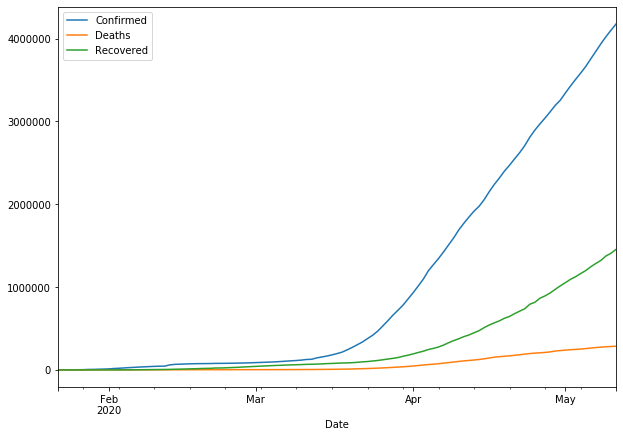

In [4]:
df_by_date = df.groupby(by = 'Date').sum()  # данные по всей планете (сумма по каждой дате)
display(df_by_date)
df_by_date.plot()

In [ ]:
в середине марта начинается значительные выявление (распространение) вируса
в начале апреля чуть улучшилось понимание как бороться с вирусом - несколько больше стали выздоравливать
2. Top 10 стран по зараженным на момент сбора dataset-a
столбчатая диаграмма для визуального сравнения

In [ ]:
df_by_country = df.groupby(['Country', 'Date']).sum() # объединение по всем регионам страны на каждую дату

# выделение итогового значения (максимального) на последнюю дату для каждой страны:
df_by_country = df_by_country.reset_index()  \
    .groupby(by = 'Country').max() \
    .sort_values(by = 'Confirmed', ascending=False).reset_index()
display(df_by_country)

In [ ]:
df_by_country2 = df_by_country.head(10)
plt.barh(df_by_country2['Country'], df_by_country2['Confirmed'])
plt.xlabel('Quantity')
plt.ylabel('Counties')
plt.title('Top 10 contries by confirmed')

In [ ]:
Выводы
Стобчатая диаграмма:

количество зараженных
страны Цель: посмотреть сравнительный масштаб бедствия по странам
США больше всех зараженных,
Испарния, Англия, Россия и Италия - примерно одинакого
Вопрос: Как в дата сет df_by_country2 додавить отдельную строку из друго дата сета df_by_counry?

In [ ]:
df_by_country.loc[df_by_country.Country == 'Mainland China']

In [ ]:
3. Уровень сметрности в 10 стран с большим распространением вируса¶

In [ ]:
df_by_country['Mortality'] = 100*df_by_country.Deaths / df_by_country.Confirmed
df_by_country[df_by_country.Confirmed > 10000].sort_values(by='Mortality', ascending=False).head()

In [ ]:
df_by_country[df_by_country.Confirmed > 10000]['Mortality'].plot(kind='box')

In [ ]:
Выводы
Boxplot - наглядно видно средний (медианный) уровень, максимальный и минимальный, а также выбросы

построен по одному столбцу - смертность (в %)

смертность в большиенсве стран менее 5%
есть ряд стран, в которых сметрность аномально высокая - вплоть до 30%
выбросы могут быть связаны тем, что в некоторых странах мала статистика или неполные данные известны

In [ ]:
plt.barh(df_by_country['Country'].head(10), df_by_country['Mortality'].head(10))

In [ ]:
4 Распределение смертности
In [11]:
sns.distplot(df_by_country[df_by_country.Confirmed > 10000]['Mortality'], bins=20 )

In [ ]:
Вывод
Распределение смертности по странам с количеством заболевших более 10 тыс. человек

большнство стран действительно сдерживают смертность не более 6-8%
страны по сметрности от вируса можно разделить на две группы - до 6%, 10-17%
5 Текущее соотношение болеющих, выздоровивших и умерших (по миру)
In [12]:
df_by_country['Ill'] = df_by_country.Confirmed - df_by_country.Deaths - df_by_country.Recovered
sum1 = df_by_country[['Ill','Deaths', 'Recovered']].sum()
sum1.plot.pie()

In [ ]:
Вывод
Круговая диаграмма - наглядно показывает соотнешение категорий людей, затронутых вирусом (всего 3 категории)

пока больше половины выявленных зараженных еще болеет
больше четверти уже побороло болезнь
6 Разные пробы
In [13]:
df_Ru = df[df.Country == 'Russia'][['Date','Confirmed','Deaths', 'Recovered']]
df_Ru['ts'] = df_Ru.Date.astype('int64') 
display(df_Ru)

In [ ]:
df_Ru[['Confirmed','Deaths', 'Recovered']].plot(kind = 'line',rot=45)

In [ ]:
sns.lmplot(x='ts',y="Confirmed", data=df_Ru, order = 2);

In [ ]:
df_Ru[['Confirmed','Deaths', 'Recovered']].plot(kind='bar', rot=45, stacked=True)

In [ ]:
!pip install plotly==4.7.1

In [ ]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [ ]:
trace0 = go.Scatter(
    x=df_by_country.Confirmed,
    y=df_by_country.Recovered,
    mode = 'markers+text',
    text = df_by_country.Country,
    textposition='bottom center'
)

data = [trace0]
layout = {'title': 'Confirmed and Recovered', 'yaxis': {'title': 'Recovered'}, 
          'xaxis': {'title': 'Confirmed'}}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)